<a href="https://colab.research.google.com/github/Matthew-Crain/100daysofcode/blob/main/Pyspark_Listening_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 :
Installing pyspark module

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=ca718c9f9690412ab7e1d3aa509bb6ce6929ce4683aef21217f8f033f58121e2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


Importing the modules

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [ ]:
spark = SparkSession.builder.appName("spark_app").getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [10]:
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [ ]:
listening_df=listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

let's see the schema:

In [ ]:
listening_df.printSchema()

let's see the shape of our dataframe:

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('track','artist')
q0.show()

**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

**Query #3:**

find top 10 famous tracks

In [ ]:
q3= listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [ ]:
q4 = listening_df.select('artist','track').filter(listening_df.artist == 'Rihanna').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2691|
|Rihanna|Only Girl (In the...| 1829|
|Rihanna|We Found Love (fe...| 1754|
|Rihanna|            Rude Boy| 1390|
|Rihanna|                 S&M| 1368|
|Rihanna|            Diamonds| 1314|
|Rihanna|      Kiss it Better|  953|
|Rihanna| Where Have You Been|  899|
|Rihanna|Cheers (Drink to ...|  715|
|Rihanna|           Disturbia|  691|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums

In [ ]:
q5 = listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [11]:
genre_csv_path = '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)

let's check the data

In [13]:
music_df = listening_df.join(genre_df, listening_df.artist == genre_df.artist, 'inner')
music_df.show()

+-----------+-------------+--------------------+------------+--------------------+------------+--------------------+
|    user_id|         date|               track|      artist|               album|      artist|               genre|
+-----------+-------------+--------------------+------------+--------------------+------------+--------------------+
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|    Jessie J| Ariana Grande & ...|
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|    Jessie J| Jhene Aiko & Rixton|
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|    Jessie J| Nicki Minaj & Ar...|
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|    Jessie J|                 pop|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|           Price Tag|    Jessie J| Ariana Grande & ...|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|   

Let's inner join these two data frames

**Query #6**

find top 10 users who are fan of ***pop*** music

In [14]:
q6 = music_df.select('user_id').filter(music_df.genre == 'pop').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|    musicboy80s|  384|
|   BlueKnockOut|  378|
|  incultojurgis|  374|
| ElektricOrchid|  371|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|        DP_Sage|  320|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [16]:
q7 = music_df.select('genre').groupby('genre').agg(count('genre').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2811365|
|       pop|1653729|
|electronic| 590315|
|   hip hop| 568489|
|      folk| 460192|
|indie rock| 450651|
|      punk| 397175|
|       r&b| 370578|
|     indie| 220224|
|     metal| 217371|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [18]:
q8_1 = music_df.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|               dance|    1|
| --Seph|               Bjorn|    8|
| --Seph|            new rave|    1|
| --Seph|          french pop|    1|
| --Seph| Boston Pops Orch...|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|        instrumental|    1|
| --Seph|          Nils Frahm|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               samba|    2|
| --Seph|  progressive trance|    1|
| --Seph|             ambient|    6|
| --Seph| General MDShirin...|    2|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|          snoop dogg|    4|
| --Seph|             baroque|    1|
| --Seph|        thrash metal|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [22]:
q8_2 = q8_1.groupBy('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|-InsertNameHere|        ska|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [37]:
q9 = genre_df.select('genre').filter((col('genre') == 'pop') | (col('genre')=='rock') | (col('genre') == 'metal') | (col('genre')  == 'hip hop')).groupBy('genre').agg(count('genre').alias('count')).orderBy(desc('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|   rock| 9066|
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [41]:
q9_list = q9.collect()

In [42]:
labels = [row['genre'] for row in q9_list]
counts = [row["count"] for row in q9_list]

In [44]:
print(labels)
print(counts)

['rock', 'pop', 'hip hop', 'metal']
[9066, 6960, 4288, 1854]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

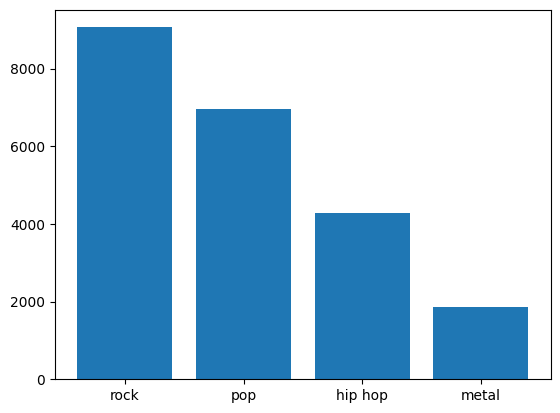

In [46]:
plts.bar(labels,counts)